# Using PIL (Pillow) for image manipulation
see https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

*Note: for compatibility with old code, Pillow is imported as `PIL`)*

In this tutorial you will learn:

- how to load an image
- how to read and write the color of a single pixel
- how to change the color depth of an image


In [2]:
from PIL import Image

In [3]:
i = Image.open("example.png")

In [4]:
type(i)

PIL.PngImagePlugin.PngImageFile

In [5]:
i.getpixel((10,10))

(59, 40, 23)

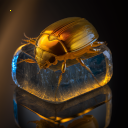

In [6]:
i.putpixel((10,10),(255,255,0,255))
i

In [7]:
ig = i.convert("L")   # ig: image_greyscale 

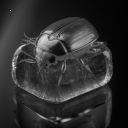

In [8]:
ig

In [9]:
i2 = Image.new("L", (8, 8))

In [10]:
i2

In [11]:
col = 0
for x in range(i2.width):
    for y in range(i2.height):
       i2.putpixel((x, y), col)
       col+=2
    col += 10

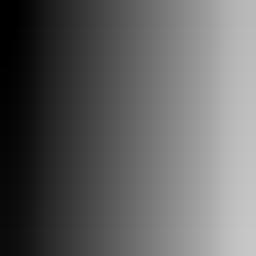

In [12]:
i2.resize((256,256))

In [13]:
i2

*(note that the resize method returns a new image and does not modify the original image)*

## A simple threshold function

**If you don't know what *histogram* or *threshold function* means in computer graphics, please read up on these terms first.**

In [16]:
from matplotlib import pyplot as plt

In [17]:
ig = ig = i.convert("L") 

In [18]:
# get a list of all pixels
pixels = [ig.getpixel((x, y)) for x in range(ig.width) for y in range(ig.height)]

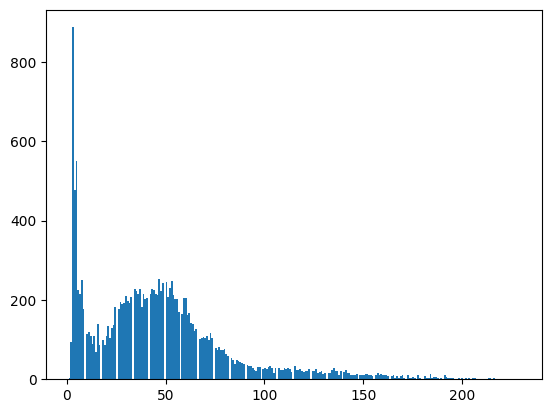

In [21]:
_ = plt.hist(pixels, bins=256)

*Note on Python style: using an underscore ('_') as a variable name is obviously a bad idea: this name does not tell you anything about what that variable means.
But that's actally the point here: [we use underscores for results that we just want to ignore](https://stackoverflow.com/questions/5893163/what-is-the-purpose-of-the-single-underscore-variable-in-python).*

In [18]:
def threshold(image, value):
    img = image.copy()
    for x in range(img.width):
        for y in range(img.height):
            if img.getpixel((x, y)) < value:
                new_value = 0            
            else:
                new_value = 255            
            img.putpixel((x, y), new_value)
    return img

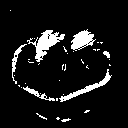

In [19]:
threshold(ig, 100)

## Interactive widgets

The ipywidgets extension allows you to add interactive widgets to your notebook, such as sliders, buttons, etc. 

Please have a look at the [ipywidgets](https://github.com/jupyter-widgets/ipywidgets) documentation and find out how to install the extension on your operating system. 

In [20]:
# with pip: pip install ipywidgets

from ipywidgets import interact, fixed
# attention: does not work on the default Schlaubox JupyterLab instance
# see https://stackoverflow.com/questions/49542417/how-to-get-ipywidgets-working-in-jupyter-lab

In [21]:
def make_threshold_function(image):
    def thresh(value):
        return threshold(image, value)
    return thresh

thresh_on_ig = make_threshold_function(ig)

*Python note: [partial application](https://en.wikipedia.org/wiki/Partial_application) is 'trick' to transform a function that needs two parameters into one that only needs one parameter - because the other parameter is already 'embedded' into the function. In Python, this can be done via a 'closure', i.e., a function within a function. Because the inner function 'inherits' the variables defined in the outer function, it knows about the `image` variable even though we don't pass it as a parameter to the inner function.*

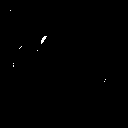

In [21]:
thresh_on_ig(200)

In [22]:
interact(thresh_on_ig, value=128)

interactive(children=(IntSlider(value=128, description='value', max=384, min=-128), Output()), _dom_classes=('…

<function __main__.make_threshold_function.<locals>.thresh(value)>

In [23]:
interact(threshold, image=fixed(ig), value=128)

interactive(children=(IntSlider(value=128, description='value', max=384, min=-128), Output()), _dom_classes=('…

<function __main__.threshold(image, value)>

## Your tasks

Try to complete them until our tutorial session next Tuesday. I will have a look at your solutions and expect working code for at least the first three tasks. 

1. Write a filter function "brightness" which scales each pixel's value by a factor between 0.0 and 1.0. Also add a slider widget that allows you to interactively modify the brightness. 

2. Write another filter function "contrast" and add an interactive widget for controlling it.

3.  Create a cell with two slider widgets - one for brightness, one for contrast. 
    These should operate on the example image together - not on two different images.

*Hint: This means that you want each of the sliders to update a global variable (brightness / contrast) and then call a function `brightness_contrast(img, brightness, contrast)` or similar.*

4. Create another 'editor' that applies the `brightness` filter to an RGB image (i.e. `i`instead of `ig`.

5. Create another cell that allows you to scale the RGB values of an image independently (i.e. vary the brightness of each channel individually)